/var/folders/d8/mkdcmfm90_v_vf2sm3p82h280000gn/T/ipykernel_87074/1344728000.py:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  grouped_df = transposed_df.groupby((np.arange(len(transposed_df.columns)) // 2) + 1, axis=1).mean()


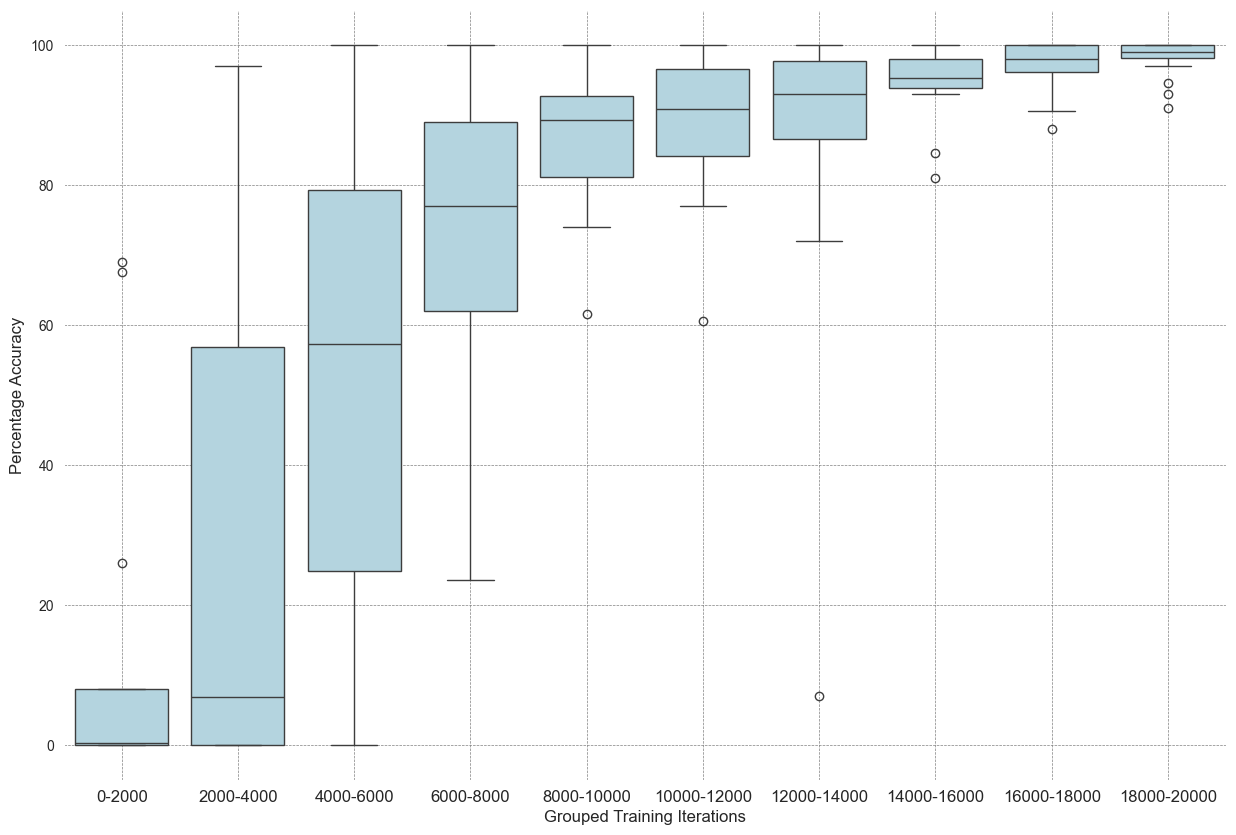

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the CSV file
df = pd.read_csv('../Data/ARDA ML - Iteration vs Accuracy.csv')

# Sort the DataFrame by values in all columns, from smallest to largest
for i in range(len(df)):
    df.iloc[i] = df.iloc[i].sort_values().values

transposed_df = df.transpose()

# Group the columns in pairs and take their average (each group represents 2000 iterations)
grouped_df = transposed_df.groupby((np.arange(len(transposed_df.columns)) // 2) + 1, axis=1).mean()

# Create a box plot for the grouped iterations
plt.figure(figsize=(15, 10))
sns.boxplot(data=grouped_df, color="lightblue")

plt.gca().set_facecolor('white')
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')  # Adding a grid
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

# Set plot titles and labels with larger font size
plt.xlabel('Grouped Training Iterations', fontsize=12)
plt.ylabel('Percentage Accuracy', fontsize=12)
plt.ylim(-5, 105)  

# Set x-axis labels to reflect grouped iteration numbers
group_labels = [f'{i*2000}-{(i+1)*2000}' for i in range(len(grouped_df.columns))]
plt.xticks(ticks=range(len(grouped_df.columns)), labels=group_labels, fontsize=12)

# Save the plot to a file
output_file_path = '../Data/box_plot_iteration_vs_accuracy.png'
plt.savefig(output_file_path)

# Show the plot
plt.show()
